###  아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

In [ ]:
import random
random.randint(327, 501, step =10)*100

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
######################### 고객 속성 데이터 생성을 위한 random Field 생성
CustID=np.arange(10001, 11001)                                                                                         ## 고객 ID
Gender=np.random.choice(2, size=1000)                                                                                   ## 고객 Gender Female: 0, Male: 1 # gender=np.random.randint(2, size=1000) 동일
Age=np.random.randint(10,101, size=1000)                                                                                ## 고객 나이 10~100세
Region=np.random.randint(1,11, size=1000)                                                                               ## 구매 고객 지역: 1~10 지역

######################### 고객 속성 DATAFRAME 생성
DF_Customers=pd.DataFrame(np.column_stack([CustID, Gender, Age, Region]), columns=['CustID', 'Gender', 'Age', 'Region'])


#########################  거래 데이터 생성을 위한 Random Field 생성
OrderID=np.arange(1, 10001)
CustID=np.random.randint(10001, 11001, size=10000)                                                                      ## 주문 ID
OrderDate=np.random.choice(pd.date_range(start='2020-01-01',end='2021-12-31', freq='D', normalize=True), size=10000)    ## 주문 시간
OrderDW=pd.to_datetime(OrderDate).day_name()                                                                            ## 주문 시간: 요일
ProdID=np.random.randint(1,31, size=10000)                                                                              ## 주문 상품 ID
## 주문 상품의 가격 (1000원 단위): 저가(~10000 원) / 중가(10000~30000원) / 고가 (30000~50000원) 분류별 가격
Price = np.random.normal(loc=30000, scale=5000, size=10000).astype(int)
Price[Price <= 10000] = np.random.normal(loc=5000, scale=1000, size=np.sum(Price <= 10000)).astype(int)
Price[(Price > 10000) & (Price <= 30000)] = np.random.normal(loc=20000, scale=5000, size=np.sum((Price > 10000) & (Price <= 30000))).astype(int)

Quantity = np.random.randint(1, 101, size=10000)
OrderTime = np.random.randint(1, 25, size=10000)

OrderAmount = Price * Quantity

# 거래 데이터 DataFrame 생성
DF_Orders = pd.DataFrame({
    'OrderID': OrderID, 'CustID': CustID, 'OrderDate': OrderDate,'OrderDW': OrderDW,
    'ProdID': ProdID, 'Price': Price, 'Quantity': Quantity, 'OrderTime': OrderTime,
    'OrderAmount': OrderAmount
})

#########################  고객 정보를 담은 1000 entries의 DF_Customers 와 주문 정보를 담은 10000 entries의 DF_Orders 통합 데이터 프레임 생성
# DF_Customers와 DF_Orders를 CustID 열을 기준으로 Merge ==> 고객/주문 정보 통합 DataFrame
IntegOrders = pd.merge(DF_Orders, DF_Customers, on='CustID', how='left')

# 주문 수량과 나이 간의 선형 상관관계 추가 (양의 상관관계)
IntegOrders['Quantity'] += IntegOrders['Age'] * 0.5

# 주문 수량과 지역 간의 선형 상관관계 추가 (양의 상관관계)
IntegOrders['Quantity'] += IntegOrders['Region'] * 10


# 병합된 데이터프레임 출력
IntegOrders.head(10)

,OrderID,CustID,OrderDate,OrderDW,ProdID,Quantity,OrderTime,Gender,Age,Region,Price,OrderAmount
0,1,10679,2020-05-30 21:00:00,Saturday,17,31,21,1,98,3,46000.0,1426000.0
1,2,10269,2020-10-11 21:00:00,Sunday,5,52,21,1,77,4,NaN,NaN
2,3,10577,2020-12-10 08:00:00,Thursday,10,79,8,1,54,8,33000.0,2607000.0
3,4,10895,2021-06-01 00:00:00,Monday,26,34,24,0,13,4,30700.0,1043800.0
4,5,10765,2021-08-19 15:00:00,Thursday,2,11,15,1,25,9,NaN,NaN


In [3]:
DF_Prods.head(30)


,ProdID,Price
0,10,33000
1,11,42500
2,12,44300
3,13,49100
4,14,49700
5,15,43700
6,16,34700
7,17,46000
8,18,41000
9,19,33000


In [ ]:
plt.figure(figsize=(6, 6))
DF_Prods['Price'].plot.hist(alpha=1, bins=30, color='g')

In [ ]:
print(IntegOrders.info())
print(IntegOrders.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      10000 non-null  int64         
 1   CustID       10000 non-null  int64         
 2   OrderDate    10000 non-null  datetime64[ns]
 3   OrderDW      10000 non-null  object        
 4   ProdID       10000 non-null  int64         
 5   Price        10000 non-null  int64         
 6   Quantity     10000 non-null  int64         
 7   OrderTime    10000 non-null  int64         
 8   OrderAmount  10000 non-null  int64         
 9   Gender       10000 non-null  int64         
 10  Age          10000 non-null  int64         
 11  Region       10000 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 937.6+ KB
None
           OrderID        CustID                   OrderDate        ProdID  \
count  10000.00000  10000.000000                   

#### Data Review
  - 우선 가동된 data라 결측치나 후처리가 필요한 data는 없음



#### Data 분석

  (1) Gender<br>
    - 성별에 따른 구매력 및 선호 상품 금액대를 비교 <br>
        * 난수로 생성된 data라 실재 data에서 보여야할 skew가 전혀 반영이 안됨 <br>
        * 수정 사항 1: 대동 소이한 남/여에 따른 구매력 수정 필요 남성 대비 여성의 구매력 증가<br>
        * 수정 사항 2: 남/여에 따라 선호하는 상품 금액대 조정

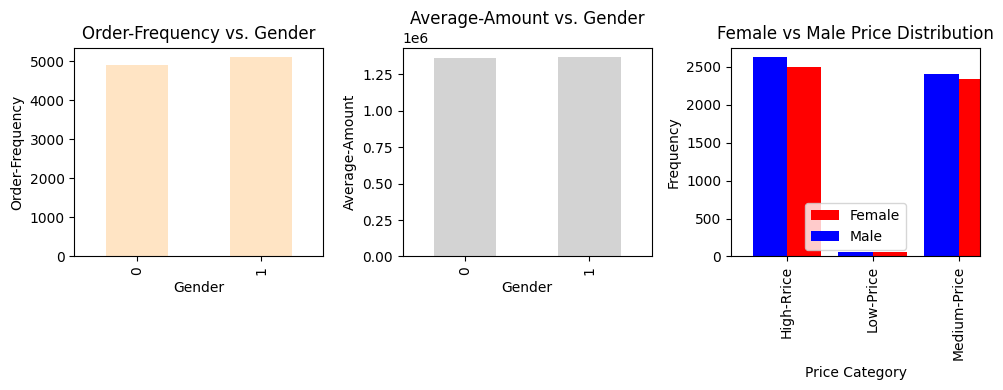

In [ ]:
# 1-1: 남/여에 따른 구매력 (구매 횟수) 비교
OrderFreq_Gender = IntegOrders.groupby('Gender')['OrderID'].count()

# 1-2: 남/여에 따른 구매력 (평균 구매액) 비교
OrderAmount_Gender = IntegOrders.groupby('Gender')['OrderAmount'].mean()


# 1-3: 남/여에 따른 선호 상품 가격대
# 구매 상품의 가격대 분류
def Price_Categ(price):
  if price <= 10000: return 'Low-Price'
  elif price <= 30000:    return 'Medium-Price'
  else: return 'High-Rrice'

IntegOrders['PriceCategory'] = IntegOrders['Price'].apply(Price_Categ)
PriceDistrib_Gender = IntegOrders.groupby(['Gender', 'PriceCategory']).size()
PriceDistrib_Gender = PriceDistrib_Gender.unstack()

# Plot 비교
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
OrderFreq_Gender.plot(kind='bar', color='bisque')
plt.title('Order-Frequency vs. Gender')
plt.ylabel('Order-Frequency')

plt.subplot(1, 3, 2)
OrderAmount_Gender.plot(kind='bar', color='lightgrey')
plt.title('Average-Amount vs. Gender')
plt.ylabel('Average-Amount')

plt.subplot(1, 3, 3)
PriceDistrib_Gender.loc[0].plot(kind='bar', color='r', width=0.4, position=0, label='Female')
PriceDistrib_Gender.loc[1].plot(kind='bar', color='b', width=0.4, position=1, label='Male')
plt.title('Female vs Male Price Distribution')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout(); plt.show()


  (2) Age<br>
    - 연령에 따른 구매력 및 선호 상품 금액대를 비교 <br>
        * 전 연령대에서 구매력 (빈도/총주문액)이 비슷하게 나온 문제 <br>
        * 수정 사항 3: 연령대에 따른 구매력 차이 ex) 10대/60대이상 구매력을 낮추고, 30대, 20대, 40대 순으로 수정<br>
        * 수정 사항 4: 연령대에 따라 선호하는 상품 금액대 조정 <rb>
          10대/60대 이상 저가 상품, 20/20대 중가 선호, 40대 고가품 선호로 수정

In [ ]:
# Age 그룹
bins = [10, 20, 30, 40, 50, 60, np.inf]
labels = ['10s', '20s', '30s', '40s', '50s', '60s+']
IntegOrders['AgeGroup'] = pd.cut(IntegOrders['Age'], bins=bins, labels=labels, right=False)

# 2-1: 연령대에 따른 구매력 (구매 횟수) 비교
OrderFreq_Age = IntegOrders.groupby('AgeGroup')['OrderID'].count()

# 2-2: 연령대에 따른 구매력 (평균 주문 금액) 비교
OrderAmount_Age = IntegOrders.groupby('AgeGroup')['OrderAmount'].sum()

# 2-3: 연령대에 따른 선호 상품 가격대
# 구매 상품의 가격대 분류
PriceDistrib_Age = IntegOrders.groupby(['AgeGroup', 'PriceCategory']).size()
PriceDistrib_Age = PriceDistrib_Age.unstack()



#### ==> 아래 plot 결과로부터 60세 이상의 연령대가 구매력이 높은 것 처럼 보이지만.. 난수 발생시 어느정도 uniform하게 연령대가 붙포할 텐데.
#### 60대 이상을 1-그룹으로 묶어서 비교하면서 표본수가 다른 연령대 대비 상대적으로 많아져서 보이는 현상
#### 평균 구매액  평균 구매 횟수로 재 탐색


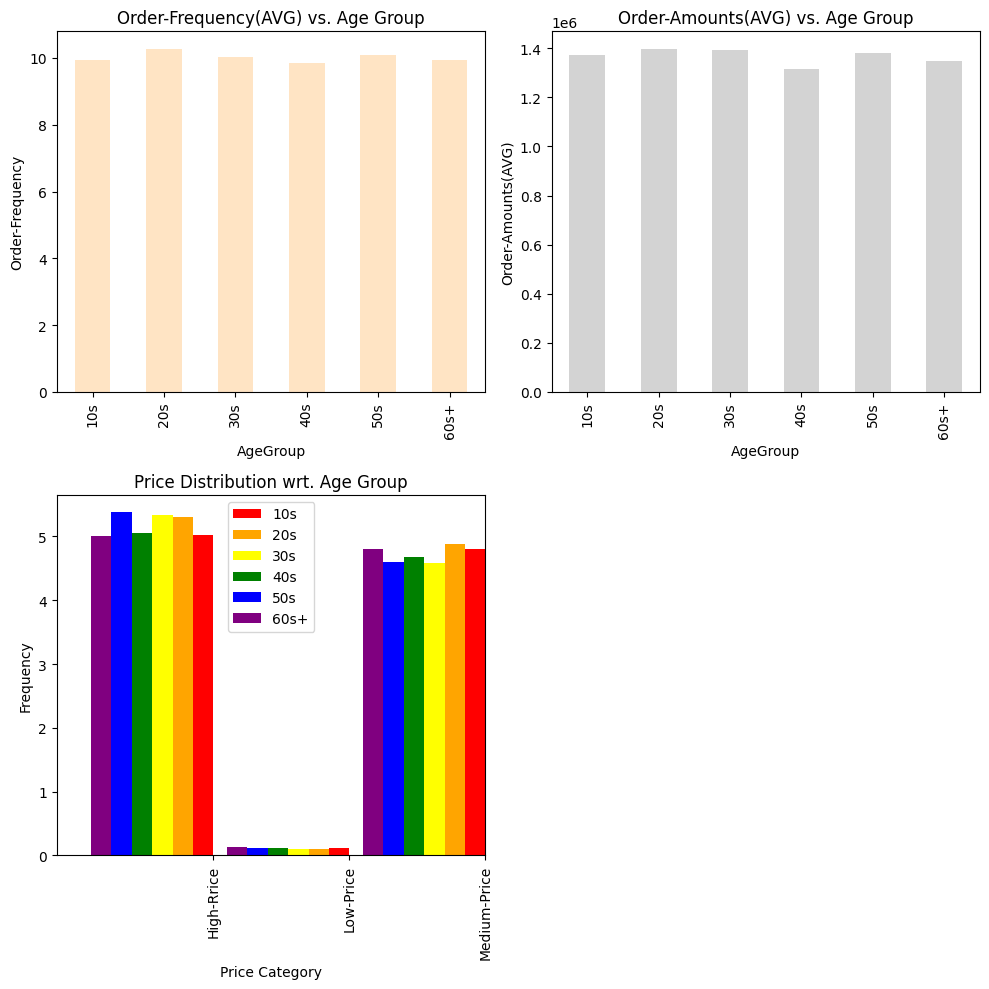

In [ ]:
# Age 그룹 수정
bins = [10, 20, 30, 40, 50, 60, np.inf]
labels = ['10s', '20s', '30s', '40s', '50s', '60s+']
IntegOrders['AgeGroup'] = pd.cut(IntegOrders['Age'], bins=bins, labels=labels, right=False)

# 각 나이 그룹별 총 인원수 계산
AgeGroupCounts = IntegOrders.groupby('AgeGroup')['CustID'].nunique()
# 2-1: 연령대에 따른 구매력 (구매 횟수) 비교
# 모든 연령대가 고루 생성되어 60대 이상이 가장 많은 표본을 차지
# 각 나이 그룹별 주문 횟수를 해당 연령 그룹의 총 인원 수로 나눈 평균 주문 횟수
OrderFreq_Age = IntegOrders.groupby('AgeGroup')['OrderID'].count() / AgeGroupCounts

# 2-2: 연령대에 따른 구매력 (평균 주문 금액) 비교
AvgAmount_Age = IntegOrders.groupby('AgeGroup')['OrderAmount'].mean()

# 2-3: 연령대에 따른 선호 상품 가격대
# 구매 상품의 가격대 분류
PriceDistrib_Age = IntegOrders.groupby(['AgeGroup', 'PriceCategory']).size()/ AgeGroupCounts
PriceDistrib_Age = PriceDistrib_Age.unstack()

# Plot 비교
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
OrderFreq_Age.plot(kind='bar', color='bisque')
plt.title('Order-Frequency(AVG) vs. Age Group')
plt.ylabel('Order-Frequency')

plt.subplot(2, 2, 2)
AvgAmount_Age.plot(kind='bar', color='lightgrey')
plt.title('Order-Amounts(AVG) vs. Age Group')
plt.ylabel('Order-Amounts(AVG)')

plt.subplot(2, 2, 3)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for i, age_group in enumerate(labels):
    PriceDistrib_Age.loc[age_group].plot(kind='bar', color=colors[i], width=0.15, position=i+1, label=age_group)

plt.title('Price Distribution wrt. Age Group')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
IntegOrders.head(10)

,OrderID,CustID,OrderDate,OrderDW,ProdID,Price,Quantity,OrderTime,OrderAmount,Gender,Age,Region,PriceCategory,AgeGroup
0,1,10260,2020-04-12 11:00:00,Sunday,22,31000,59,11,1829000,0,88,2,High-Rrice,60s+
1,2,10355,2020-08-07 12:00:00,Friday,20,12000,11,12,132000,0,92,9,Medium-Price,60s+
2,3,10117,2020-01-24 09:00:00,Friday,29,36000,5,9,180000,1,32,10,High-Rrice,30s
3,4,10165,2021-06-29 05:00:00,Tuesday,1,9000,27,5,243000,1,26,6,Low-Price,20s
4,5,10427,2021-02-24 19:00:00,Wednesday,15,12000,5,19,60000,0,97,6,Medium-Price,60s+
5,6,10367,2021-01-12 20:00:00,Tuesday,13,16000,15,20,240000,0,86,2,Medium-Price,60s+
6,7,10021,2020-12-02 12:00:00,Wednesday,28,47000,3,12,141000,0,10,10,High-Rrice,10s
7,8,10234,2020-07-30 20:00:00,Thursday,4,5000,8,20,40000,0,27,1,Low-Price,20s
8,9,10134,2021-05-09 18:00:00,Sunday,18,30000,27,18,810000,0,78,9,Medium-Price,60s+
9,10,10729,2021-01-12 00:00:00,Monday,9,8000,100,24,800000,1,88,9,Low-Price,60s+
